# Brightness

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

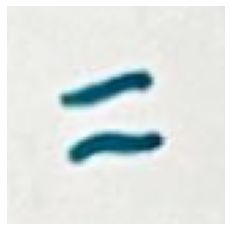

In [5]:
img = plt.imread('../dataset/handwritten_operators/equal/blue = 3.png')
plt.axis('off')
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


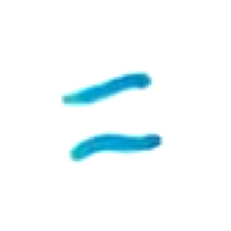

In [12]:
# Increase brightness on a scale of 0-255
def increase_brightness(img, brightness=0):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_v = img_hsv[:,:,2]
    
    img_v = np.asarray(img_v)
    img_v[img_v > 255 - brightness] = 255
    img_v[img_v <= 255 - brightness] += brightness

    h, w = img.shape[:2]

    for y in range(h):
        for x in range(w):
            img_hsv[y, x, 2] = img_v[y, x]

    
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
    return img_hsv

    
img_bright = increase_brightness(img, .4)



In [38]:
def threshold(img, threshold, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    
    img_gray[img_gray >= threshold] = 255
    img_gray[img_gray < threshold] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

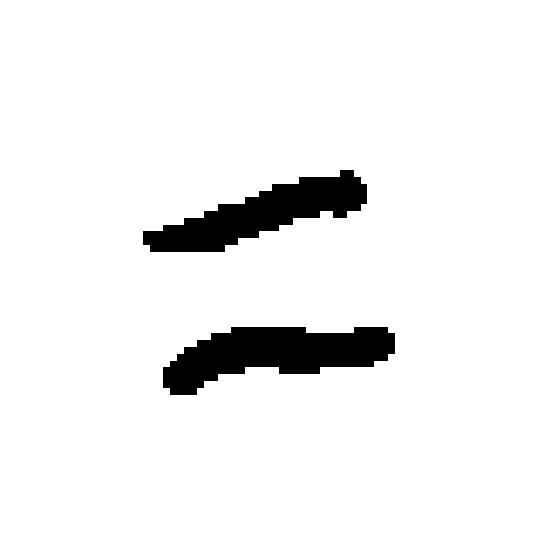

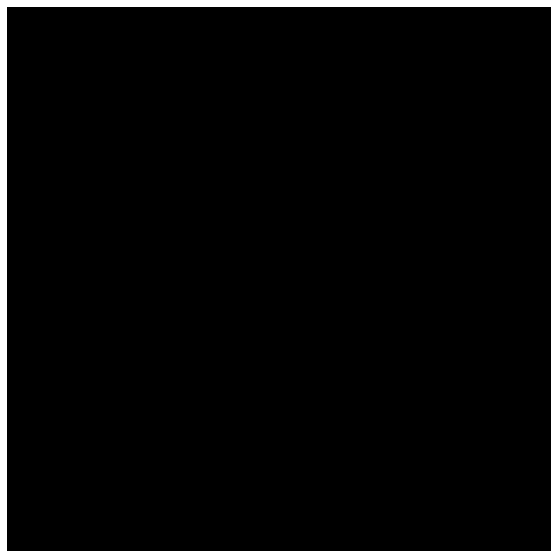

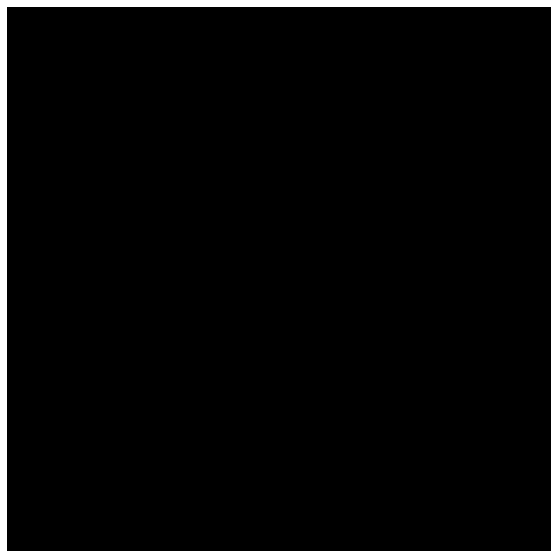

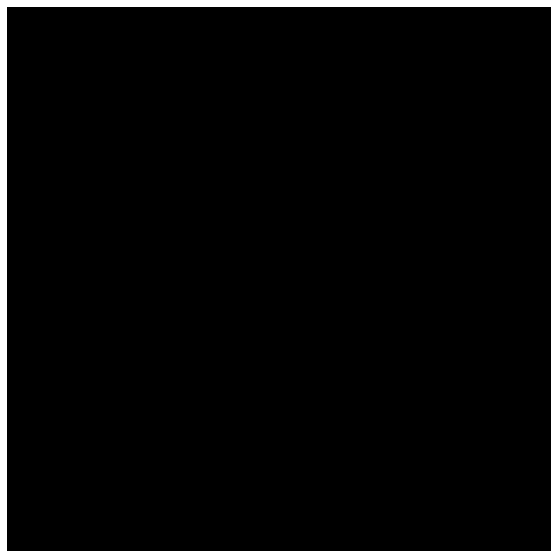

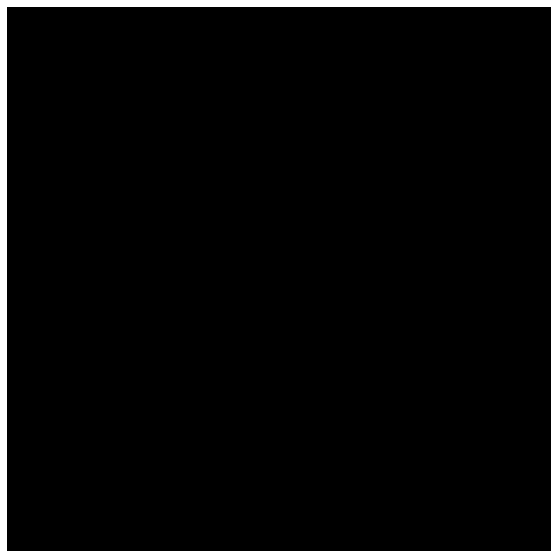

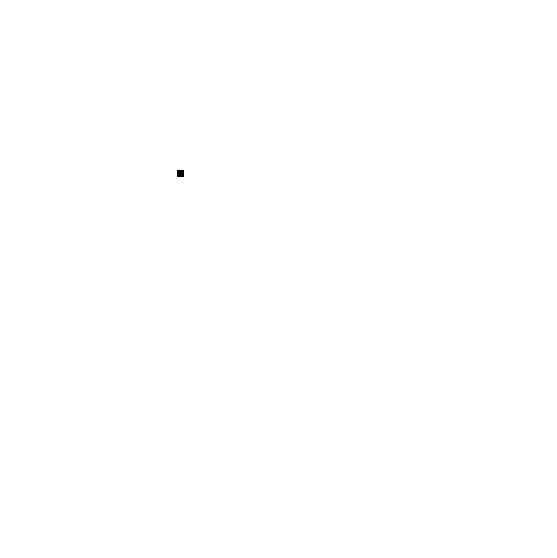

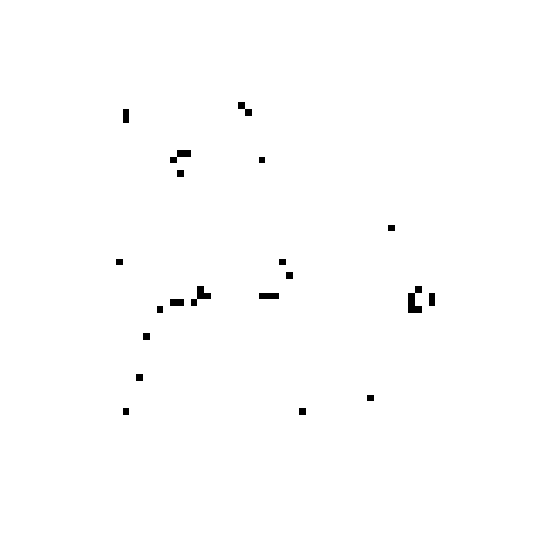

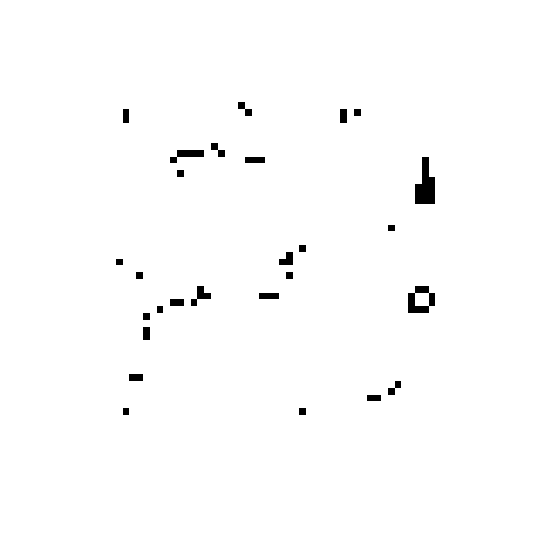

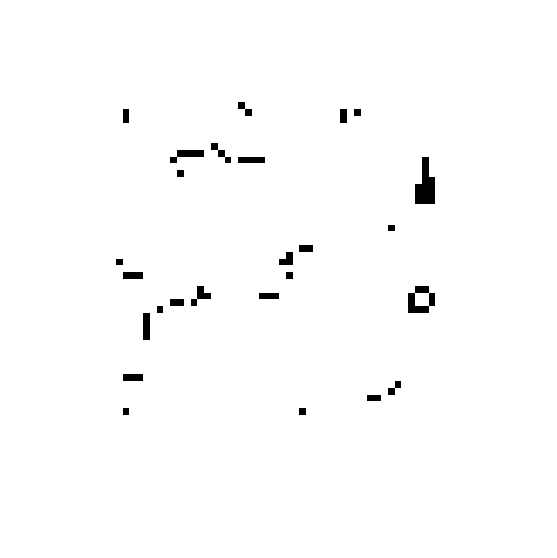

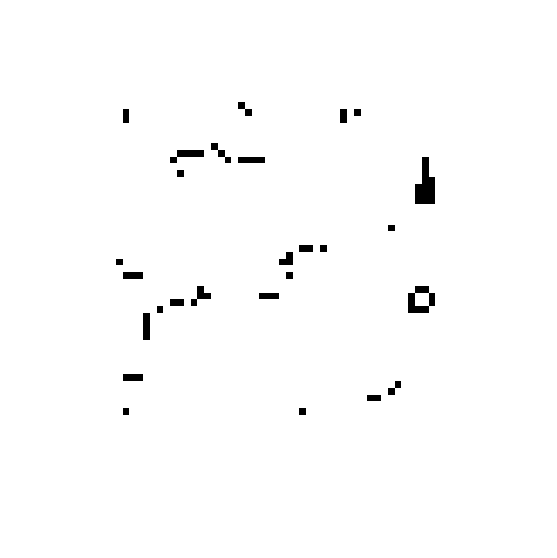

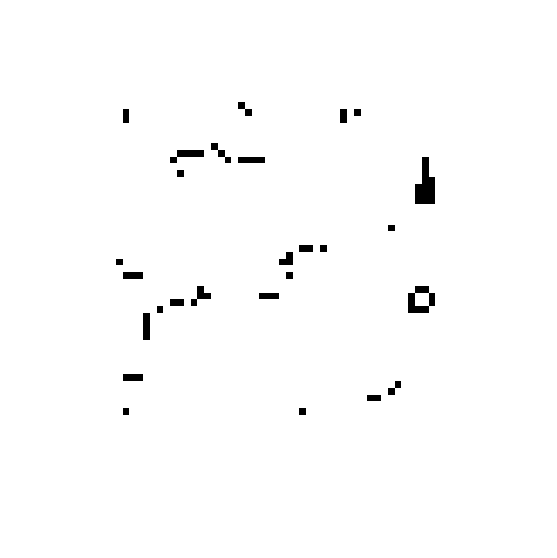

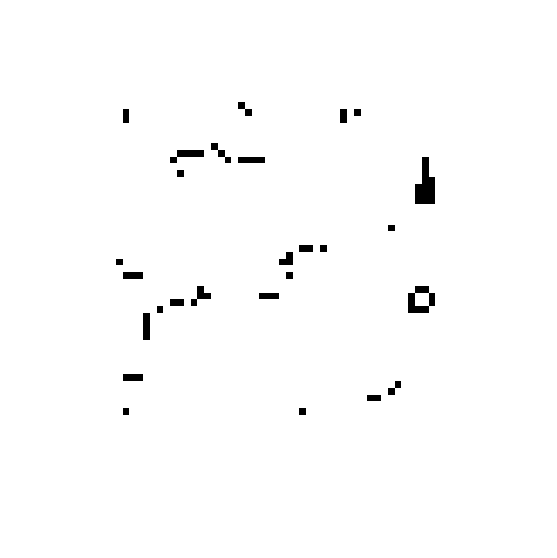

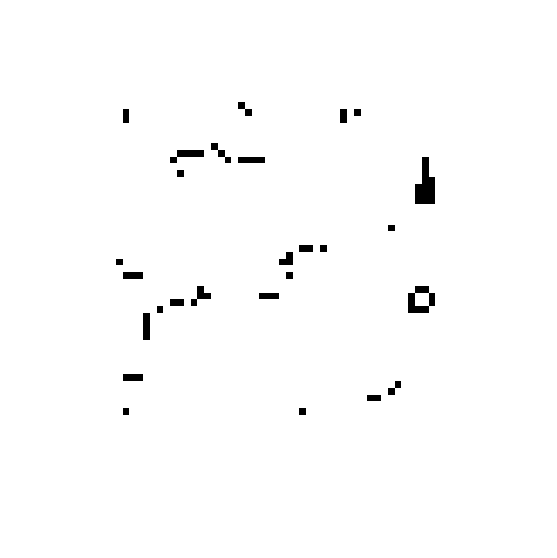

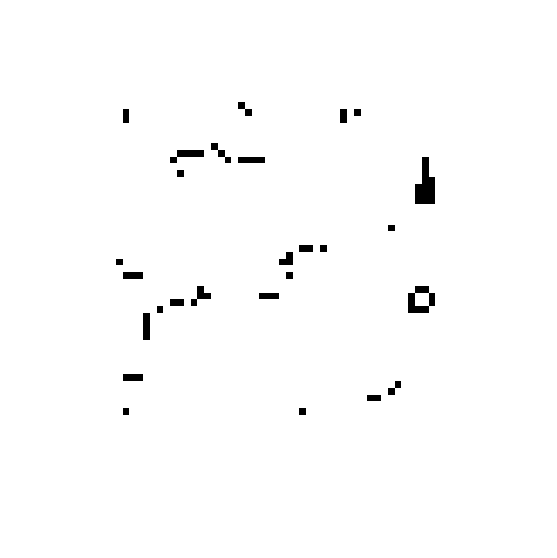

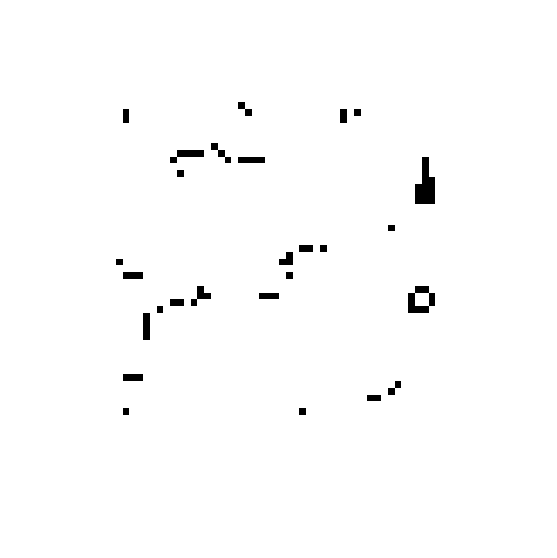

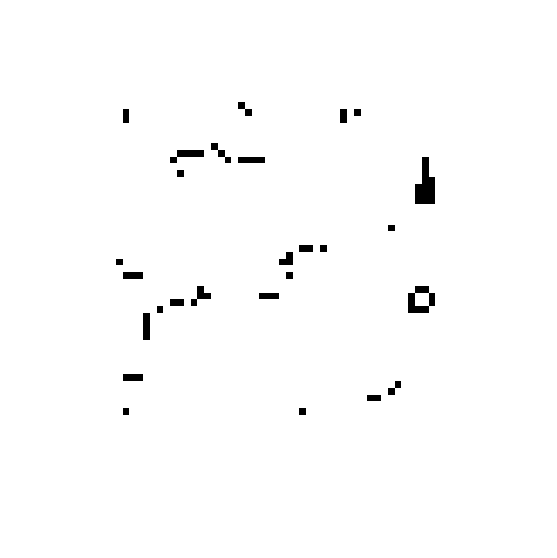

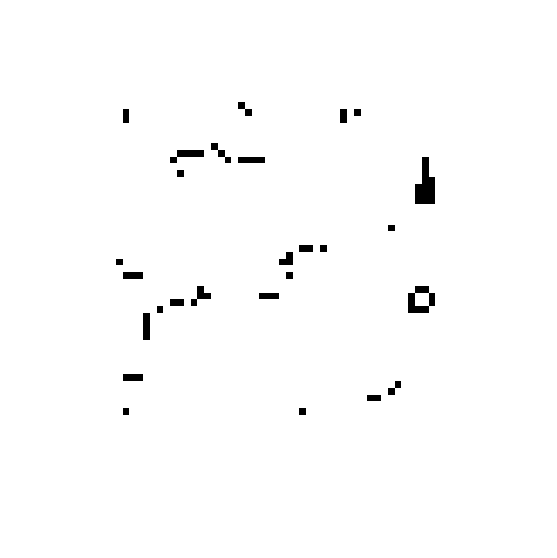

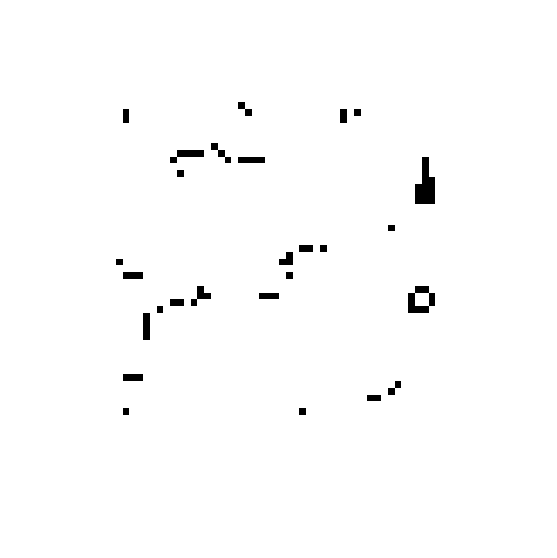

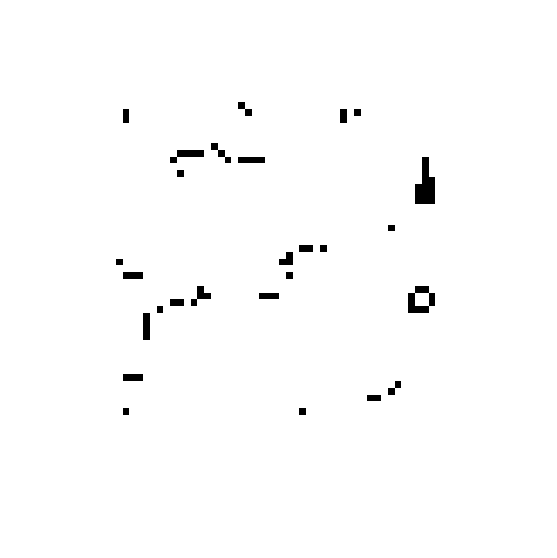

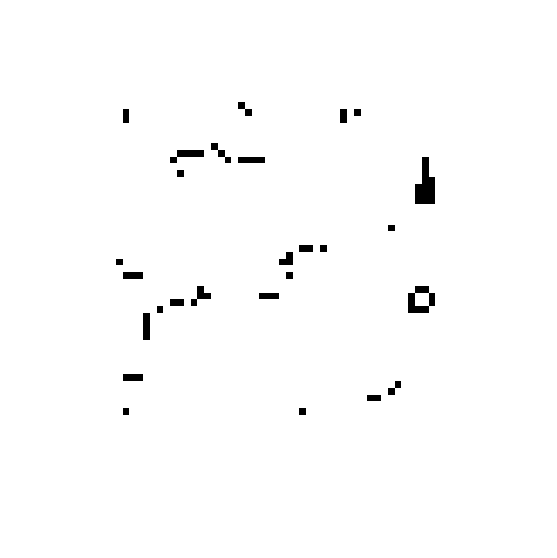

In [51]:

threshold(img, .5)
for i in range(1, 20):
    threshold(img_bright, i * .01 + .1)

In [16]:
def median_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    median = np.median(img_gray)

    img_gray[img_gray >= median] = 255
    img_gray[img_gray < median] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

[[0.93384707 0.93429416 0.93384707 ... 0.9040941  0.89232945 0.8950785 ]
 [0.93384707 0.9354667  0.93429416 ... 0.91193724 0.89900005 0.89900005]
 [0.9303726  0.93429416 0.93429416 ... 0.91860783 0.9063961  0.9024745 ]
 ...
 [0.93384707 0.92924315 0.9287961  ... 0.92992556 0.91585886 0.91031766]
 [0.93384707 0.93663925 0.93663925 ... 0.9260039  0.9146863  0.91031766]
 [0.93384707 0.9327177  0.9327177  ... 0.92208236 0.9142392  0.91031766]]
[[21.692814 22.587374 21.692814 ... 18.0989   18.097692 22.583332]
 [21.692814 18.102135 22.587374 ... 18.099707 22.583735 22.583735]
 [22.586967 22.587374 22.587374 ... 22.585752 21.690054 21.689663]
 ...
 [21.692814 13.616763 14.516246 ... 21.69242  18.10011  21.690449]
 [21.692814 14.517036 14.517036 ... 21.692022 22.585348 21.690449]
 [21.692814 14.51664  14.51664  ... 21.69163  21.69084  21.690449]]


array([[255., 255., 255., ...,   0.,   0., 255.],
       [255.,   0., 255., ...,   0., 255., 255.],
       [255., 255., 255., ..., 255.,   0.,   0.],
       ...,
       [255.,   0.,   0., ..., 255.,   0.,   0.],
       [255.,   0.,   0., ...,   0., 255.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

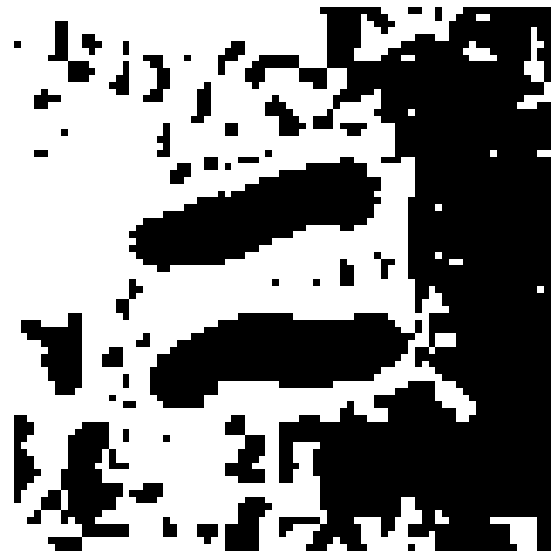

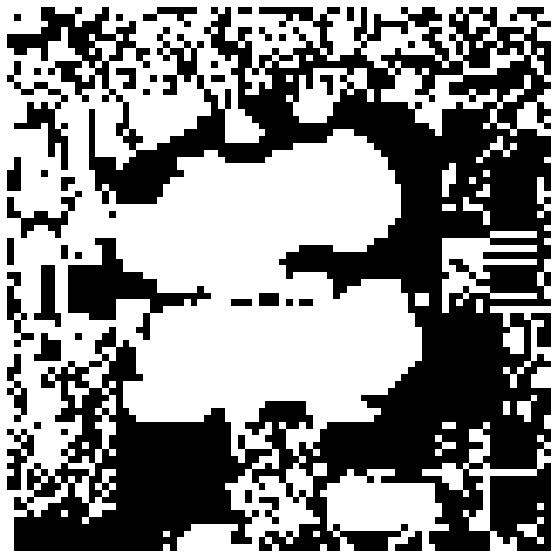

In [17]:

median_threshold(img)
median_threshold(img_bright)

In [52]:
def mean_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    mean = np.mean(img_gray)

    img_gray[img_gray >= mean] = 255
    img_gray[img_gray < mean] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

[[0.93384707 0.93429416 0.93384707 ... 0.9040941  0.89232945 0.8950785 ]
 [0.93384707 0.9354667  0.93429416 ... 0.91193724 0.89900005 0.89900005]
 [0.9303726  0.93429416 0.93429416 ... 0.91860783 0.9063961  0.9024745 ]
 ...
 [0.93384707 0.92924315 0.9287961  ... 0.92992556 0.91585886 0.91031766]
 [0.93384707 0.93663925 0.93663925 ... 0.9260039  0.9146863  0.91031766]
 [0.93384707 0.9327177  0.9327177  ... 0.92208236 0.9142392  0.91031766]]
[[21.692814 22.587374 21.692814 ... 18.0989   18.097692 22.583332]
 [21.692814 18.102135 22.587374 ... 18.099707 22.583735 22.583735]
 [22.586967 22.587374 22.587374 ... 22.585752 21.690054 21.689663]
 ...
 [21.692814 13.616763 14.516246 ... 21.69242  18.10011  21.690449]
 [21.692814 14.517036 14.517036 ... 21.692022 22.585348 21.690449]
 [21.692814 14.51664  14.51664  ... 21.69163  21.69084  21.690449]]


array([[255., 255., 255., ...,   0.,   0., 255.],
       [255.,   0., 255., ...,   0., 255., 255.],
       [255., 255., 255., ..., 255.,   0.,   0.],
       ...,
       [255.,   0.,   0., ..., 255.,   0.,   0.],
       [255.,   0.,   0., ...,   0., 255.,   0.],
       [255.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

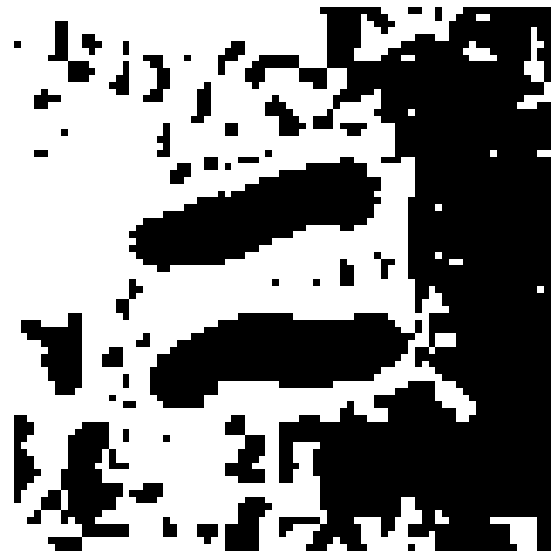

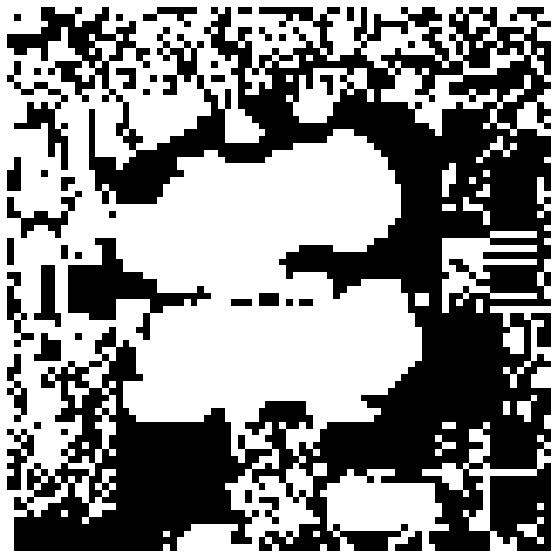

In [53]:

median_threshold(img)
median_threshold(img_bright)